<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bee Colony Algorithm (ABC) for minimization of continuous functions

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class FoodSource:
  def __init__(self, bounds, obj_function):
    self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.position)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value) 

In [ ]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)

In [ ]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0]**2)**2

In [ ]:
def paraboloid(x):
  return x[0]**2 + x[1]**2 

In [ ]:
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])

In [ ]:
def generate_new_solution(i, population, lb, ub, obj_function):

  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  phi = random.uniform(-1, 1)

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  new_j = population[i].position[j] + phi * (population[i].position[j] - population[partner].position[j])

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], lb[j], ub[j])
  
  new_objective_value = obj_function(population[i].position)
   
  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial = population[i].trial + 1 

  

In [ ]:
def ABC_algorithm(population_size, num_of_iters, limit, obj_function):

  POPULATION_SIZE = population_size
  NUM_OF_ITERATIONS = num_of_iters
  LIMIT = limit

  lower_bound = np.array([x[0] for x in bounds])
  upper_bound = np.array([x[1] for x in bounds])


  population = [FoodSource(bounds, obj_function) for _ in range(POPULATION_SIZE)]

  best_solution = min(population)

  obj_values = []
  fitness_values = []

  for k in range(NUM_OF_ITERATIONS):
    #### Employed Bee Phase ####
    for i in range(POPULATION_SIZE):
      generate_new_solution(i, population, lower_bound, upper_bound, obj_function)

    #### Onlooker Bee Phase ####
    max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
    for i in range(POPULATION_SIZE):
      population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1


    m = 0
    n = 0

    while m < POPULATION_SIZE and n < POPULATION_SIZE:
      rand_value = random.uniform(0, 1)
      if rand_value < population[n].probability:
        generate_new_solution(n, population, lower_bound, upper_bound, obj_function)
        m += 1
      n = (n % POPULATION_SIZE) + 1

    best_solution = min(min(population), best_solution)

    #### Scout Bee Phase ####
    max_index = -1
    max_trial = float('-inf')
    for index, p in enumerate(population):
      if p.trial > max_trial:
        max_trial = p.trial
        max_index = index


    if population[max_index].trial > LIMIT:
      population[max_index] = FoodSource(bounds, obj_function)

    best_solution = min(min(population), best_solution)

    obj_values.append(best_solution.obj_value)
    fitness_values.append(best_solution.fitness)

  print("position: ", [i for i in best_solution.position])
  print("objective value: ", best_solution.obj_value)
  print("fitness value: ", best_solution.fitness)

  #plt.plot(range(NUM_OF_ITERATIONS), obj_values)
  #plt.plot(range(NUM_OF_ITERATIONS), fitness_values)
  return best_solution, obj_values, fitness_values

## Comparison of fitness values ​​during the execution of the algorithm using different functions:

> ### Restrigin, Rosenbrock (examples of difficult input for minimization)

> ### paraboloid (easy of difficult input for minimization)


position:  [-2.466190006045413e-07, -6.018960946655282e-07]
objective value:  8.393996608901944e-11
fitness value:  0.99999999991606
position:  [1.0878772469736209, 1.176785121487813]
objective value:  0.012200406501002542
fitness value:  0.9879466492775109
position:  [3.4793120592060623e-09, 2.268324765252576e-09]
objective value:  1.7250909645994884e-17
fitness value:  1.0
position:  [4.137196866651864e-07, -1.3138741131146317e-05]
objective value:  3.428169037533735e-08
fitness value:  0.9999999657183108
position:  [1.0721816841974003, 1.1615315880075927]
objective value:  0.019509629521490785
fitness value:  0.9808637123607674
position:  [-6.122873900747242e-08, -6.83540386886437e-08]
objective value:  8.421233085493775e-15
fitness value:  0.9999999999999916
position:  [4.3335378647066315e-06, -0.0002440898888919241]
objective value:  1.1823898987017856e-05
fitness value:  0.9999881762408159
position:  [0.9462315522147904, 0.9011428090885804]
objective value:  0.006241902910632555


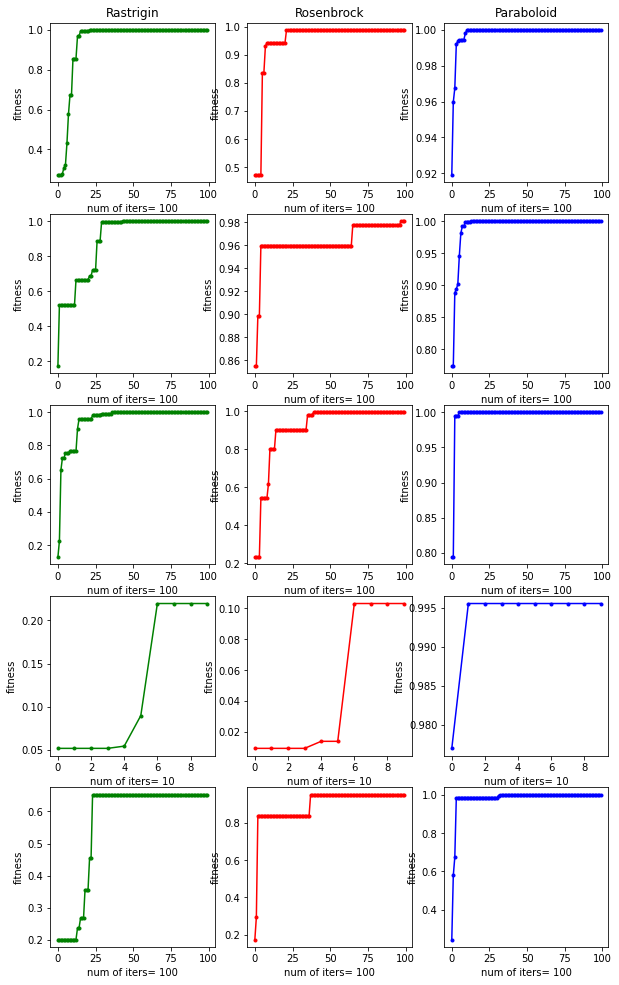

In [ ]:
population_size = [5, 50, 100, 300]
num_iters = [10, 100]
limit = [2, 5]

cols = ['Rastrigin', 'Rosenbrock']

tmp=5

plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, _, fitness_values = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 3, 1)
plt.plot(range(n), fitness_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('Rastrigin')

best_solution, _, fitness_values = ABC_algorithm(p, n, l, rosenbrock)
plt.subplot(tmp, 3, 2)
plt.plot(range(n), fitness_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('Rosenbrock')

best_solution, _, fitness_values = ABC_algorithm(p, n, l, paraboloid)
plt.subplot(tmp, 3, 3)
plt.plot(range(n), fitness_values, color='blue', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('Paraboloid')


for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 3, 3*i+1)
  plt.plot(range(n), fitness_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, rosenbrock)
  plt.subplot(tmp, 3, 3*i+2)
  plt.plot(range(n), fitness_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, paraboloid)
  plt.subplot(tmp, 3, 3*i+3)
  plt.plot(range(n), fitness_values, color='blue', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

plt.show()



## Comparison of objective function values ​​during the execution of the algorithm using different functions:

> ### Restrigin, Rosenbrock (examples of difficult input for minimization)

> ### paraboloid (easy of difficult input for minimization)


position:  [0.014897421305886338, 0.0156717538437999]
objective value:  0.09268451190536808
fitness value:  0.9151772438471288
position:  [1.2538370594301909, 1.565850253827968]
objective value:  0.06834840502216001
fitness value:  0.9360242363812558
position:  [-0.0027572824809961177, 0.004040208680080839]
objective value:  2.392589285860866e-05
fitness value:  0.9999760746795759
position:  [-0.0022257838131138907, 1.0350295425005216]
objective value:  1.3135064632632023
fitness value:  0.43224430788470736
position:  [0.42569576598593617, 0.25371456740560916]
objective value:  0.8554167460389028
fitness value:  0.538962474136812
position:  [-0.026336900332856517, 0.02888358072260977]
objective value:  0.0015278935545023323
fitness value:  0.9984744373428486
position:  [1.0012758288799146, -1.0538527503091886]
objective value:  2.6804996466856963
fitness value:  0.27170224045545116
position:  [0.7517510165093539, 0.5688735311976104]
objective value:  0.06302926675711744
fitness value: 

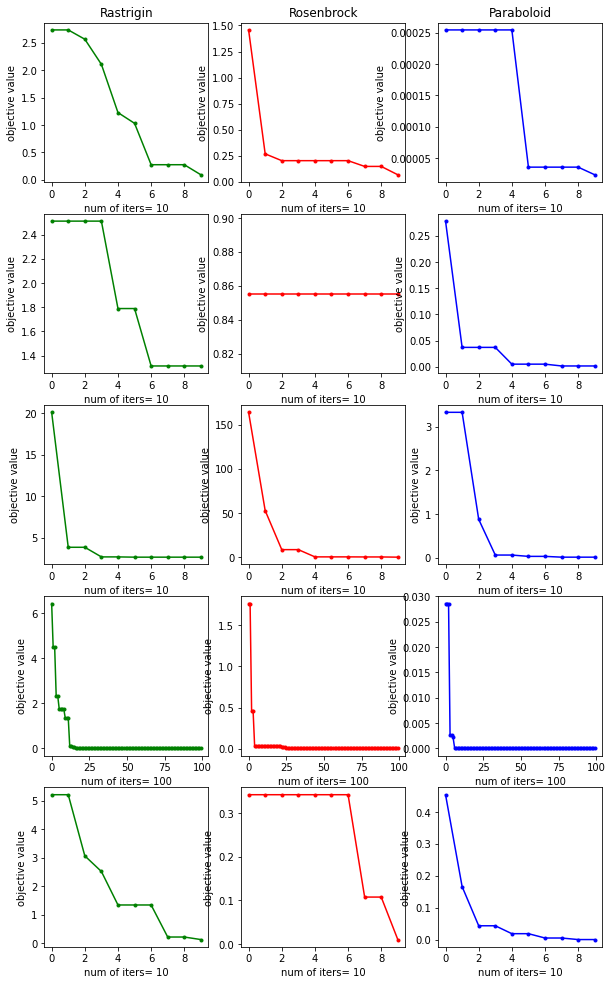

In [ ]:
plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, obj_values, _ = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 3, 1)
plt.plot(range(n), obj_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective value")
plt.title('Rastrigin')

best_solution, obj_values, _ = ABC_algorithm(p, n, l, rosenbrock)
plt.subplot(tmp, 3, 2)
plt.plot(range(n), obj_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective value")
plt.title('Rosenbrock')

best_solution, obj_values, _ = ABC_algorithm(p, n, l, paraboloid)
plt.subplot(tmp, 3, 3)
plt.plot(range(n), obj_values, color='blue', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective value")
plt.title('Paraboloid')


for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, obj_values, _30 = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 3, 3*i+1)
  plt.plot(range(n), obj_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective value")

  best_solution, obj_values, _ = ABC_algorithm(p, n, l, rosenbrock)
  plt.subplot(tmp, 3, 3*i+2)
  plt.plot(range(n), obj_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective value")

  best_solution, obj_values, _ = ABC_algorithm(p, n, l, paraboloid)
  plt.subplot(tmp, 3, 3*i+3)
  plt.plot(range(n), obj_values, color='blue', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective value")

plt.show()